# Data Import

In [1]:
#import DataFetcher class from file heart_data.py
import DataFetcher #importing the file DataFetcher.py from the folder data
data_fetcher = DataFetcher.DataFetcher("C:\\Users\\kruth\\OneDrive\\Desktop\\Cardiac_Events_ML\\preprocessing\\final_dataset.csv")
X_train = data_fetcher.get_X_train()
X_test = data_fetcher.get_X_test()
y_train = data_fetcher.get_y_train()
y_test = data_fetcher.get_y_test()
features = data_fetcher.get_features()
target_names = data_fetcher.get_target_names()
X = data_fetcher.get_X()
y = data_fetcher.get_y()


------class run complete------



# Feature scaling

In [2]:
#scaling the feature dataset:
from sklearn.preprocessing import StandardScaler 
#formula for scaling: x_scaled = (x - mean)/std_deviation
# fit the Scaler
scaler = StandardScaler() #creating an instance of the StandardScaler class.
#Scaling the values such that the mean is 0 and std deviation is 1.
scaler.fit(X_train) #fitting the scaler to the training set.
X_train = scaler.transform(X_train) #transforming the training set. 
X_test = scaler.transform(X_test) #transforming the testing set.

# Initial Model

In [3]:
#train Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

# train the model
gbc_1 = GradientBoostingClassifier()

#fitting the model to the training set.
gbc_1.fit(X_train, y_train) 

# make predictions on the test dataset
y_pred_1 = gbc_1.predict(X_test)

#---------------------------------Evaluating the model---------------------------------

# Evaluate the model performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("\n----------Initial Gradient Boosting Metrics----------\n")
print("Accuracy:", accuracy_score(y_test, y_pred_1))
print("Precision:", precision_score(y_test, y_pred_1))
print("Recall:", recall_score(y_test, y_pred_1))
print("F1 Score:", f1_score(y_test, y_pred_1))
#meaning of accuracy score: 0.9 means 90% of the predictions are correct

#classification_report
print("\n----------Initial Classification Report----------\n")
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred_1)
print(cr)


----------Initial Gradient Boosting Metrics----------

Accuracy: 0.8
Precision: 0.8529411764705882
Recall: 0.8055555555555556
F1 Score: 0.8285714285714286

----------Initial Classification Report----------

              precision    recall  f1-score   support

           0       0.73      0.79      0.76        24
           1       0.85      0.81      0.83        36

    accuracy                           0.80        60
   macro avg       0.79      0.80      0.79        60
weighted avg       0.80      0.80      0.80        60



[[19  5]
 [ 7 29]]


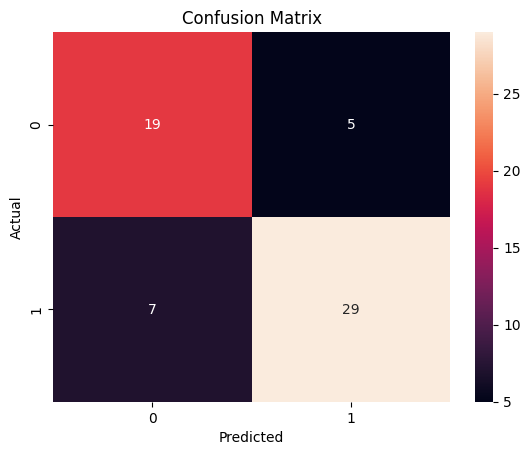

In [10]:
#get the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_1)
print(cm)

#visualize the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cm, annot=True, fmt="d") #fmt="d" means the values in the matrix are integers  
#annot=True means the values in the matrix are displayed
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Grid Search

In [31]:
#grid search for best parameters
from sklearn.model_selection import GridSearchCV
param_grid = {
    'random_state' : [42],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [30, 40, 50, 100, 200],
    'max_depth': [1, 2, 3, 5],
    'max_features': [None, 'sqrt', 'log2'],
    'subsample': [0.1, 0.5, 0.7, 1.0],
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = GradientBoostingClassifier(), param_grid = param_grid,
                            cv = 3, n_jobs = -1, verbose = 1, scoring='f1')

# Fit the grid search to the data
gbc = grid_search.fit(X_train, y_train)

#finding the best estimator:
print("\nbest estimator: ", gbc.best_estimator_)
#finding the best score:
print("best score:  ", gbc.best_score_)
#finding the best parameters:
print("best params: ", gbc.best_params_)


Fitting 3 folds for each of 720 candidates, totalling 2160 fits

best estimator:  GradientBoostingClassifier(learning_rate=0.01, max_depth=1, max_features='sqrt',
                           random_state=42, subsample=0.5)
best score:   0.862595971959497
best params:  {'learning_rate': 0.01, 'max_depth': 1, 'max_features': 'sqrt', 'n_estimators': 100, 'random_state': 42, 'subsample': 0.5}


# Final Model

In [32]:
'''
GradientBoostingClassifier(learning_rate=0.01, max_features='sqrt',
                           min_samples_leaf=4, n_estimators=200,
                           random_state=42)
'''
#test the new model with hyperparameters tuned by grid search:
#make predictions on the test dataset
y_pred = gbc.predict(X_test)

# Evaluate the model performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("\n----------Gradient Boosting Metrics----------\n")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

#classification_report
print("\n----------Classification Report----------\n")
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)




----------Gradient Boosting Metrics----------

Accuracy: 0.9
Precision: 0.875
Recall: 0.9722222222222222
F1 Score: 0.9210526315789473

----------Classification Report----------

              precision    recall  f1-score   support

           0       0.95      0.79      0.86        24
           1       0.88      0.97      0.92        36

    accuracy                           0.90        60
   macro avg       0.91      0.88      0.89        60
weighted avg       0.90      0.90      0.90        60



## Confusion Matrix

[[19  5]
 [ 1 35]]


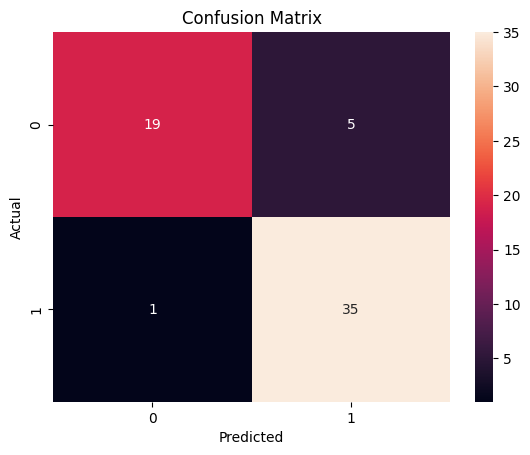

In [33]:
#get the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

#visualize the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cm, annot=True, fmt="d") #fmt="d" means the values in the matrix are integers  
#annot=True means the values in the matrix are displayed
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Cross Validation

In [34]:
#cross validation for 10 folds
#takes 3 mins to run
from sklearn.model_selection import cross_val_score
scores = cross_val_score(gbc, X_train, y_train, cv=10, scoring="f1") #scoring can be accuracy, precision, recall, f1, roc_auc, etc
#get the scores for each fold
for i in range(10):
    print("Fold", i, ":", scores[i])
    
#get the mean of the scores
print("\nMean:", scores.mean())
#get the standard deviation of the scores
print("Standard Deviation:", scores.std()) #standard deviation is calculated for the scores of each fold
#A low standard deviation indicates that the model is consistent in its performance across different subsets of the data, which is a good sign.
#get the variance of the scores
print("Variance:", scores.var()) #variance is calculated for the scores of each fold
#A low variance indicates that the model is consistent in its performance across different subsets of the data, which is a good sign.


Fitting 3 folds for each of 720 candidates, totalling 2160 fits
Fitting 3 folds for each of 720 candidates, totalling 2160 fits
Fitting 3 folds for each of 720 candidates, totalling 2160 fits
Fitting 3 folds for each of 720 candidates, totalling 2160 fits
Fitting 3 folds for each of 720 candidates, totalling 2160 fits
Fitting 3 folds for each of 720 candidates, totalling 2160 fits
Fitting 3 folds for each of 720 candidates, totalling 2160 fits
Fitting 3 folds for each of 720 candidates, totalling 2160 fits
Fitting 3 folds for each of 720 candidates, totalling 2160 fits
Fitting 3 folds for each of 720 candidates, totalling 2160 fits
Fold 0 : 0.7741935483870968
Fold 1 : 0.8461538461538461
Fold 2 : 0.8799999999999999
Fold 3 : 0.8666666666666666
Fold 4 : 0.7692307692307693
Fold 5 : 0.8275862068965517
Fold 6 : 0.8387096774193548
Fold 7 : 0.8799999999999999
Fold 8 : 0.8695652173913043
Fold 9 : 0.7857142857142857

Mean: 0.8337820217859877
Standard Deviation: 0.04108275738911593
Variance: 0.00